In [22]:
import sys
path2oti = '../../../build/'
sys.path.append(path2oti) # Add path to OTI library.

import pyoti.real   as r
import pyoti.sparse as oti 
import pyoti.core   as coti

np = oti.np

from pyaudi import gdual_double as gd
import pyaudi as pya


%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc

## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':16})
rc('text', usetex=True)

from matplotlib.ticker import MultipleLocator
# rc('font',**{'family':'serif','serif':['Palatino'], 'size':12})

In [2]:
def f_tri(x,y,z, alg = oti):
    return alg.sin(alg.log(x**2*alg.exp(y*z**2))*alg.cos(x**3*y**2*z**4))


def f_bi(x,y, alg=oti):
    return alg.sin(x*y)

def f_bi(x,y, alg=oti):
    return alg.log(x*y)

# def f_bi(x,y, alg=oti):
#     return alg.exp(x*y)

# def f_bi(x,y, alg=oti):
#     return alg.cos(x*y)

# def f_bi(x,y, alg=oti):
#     return (x*y)**100.5


def f_uni(x, alg=oti):
    return alg.sin(x)

def f_uni(x, alg=oti):
    return alg.log(x)

def f_uni(x, alg=oti):
    return alg.exp(x)

# def f_uni(x, alg=oti):
#     return alg.cos(x)

# def f_uni(x, alg=oti):
#     return x**100.5

In [3]:
x_ad = gd(0.5,"x",50)
y_ad = gd(0.8,"y",50)
z_ad = gd(1.2,"z",50)

In [4]:
# %timeit f_tri(x_ad,y_ad,z_ad,alg=pya)

In [5]:
# f_ad_eval = f_tri(x_ad,y_ad,z_ad,alg=pya)

In [6]:
%timeit f_ad_eval = f_bi(x_ad,y_ad,alg=pya)
f_ad_eval = f_bi(x_ad,y_ad,alg=pya)

7.95 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
f_ad_eval.get_derivative({'dx':25,'dy':25})

-1.0666605902783871e+60

In [8]:
x = 0.5 + oti.e(1,order = 50)
y = 0.8 + oti.e(2,order = 50)
z = 1.2 + oti.e(3,order = 50)

In [11]:
# %timeit f_eval = f_tri(x,y,z,alg=oti)

In [12]:
# f_eval = f_tri(x,y,z,alg=oti)

In [11]:
%timeit f_eval = f_bi(x,y,alg=oti)
f_eval = f_bi(x,y,alg=oti)

771 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
f_eval = f_eval.truncate([1,2])

In [12]:
dx = 0.5
dy = 0.5
f_eval.taylor_integrate([1,2],[dx,dy]).real

0.2523981864429068

In [13]:
f_bi(x.real+dx,y.real+dy,alg=oti.np)

0.26236426446749106

In [14]:
y.real+dy

1.3

In [15]:
x.real+dx

1.0

In [16]:
f_eval.get_order_im(1)

0.0000 + 2.0000 * e([1]) + 1.2500 * e([2])

In [39]:
tx = np.linspace( -0.99*x.real,0.99*x.real, 200 )
ty = np.linspace( -0.99*y.real,0.99*y.real,  200 )

Tx, Ty = np.meshgrid(tx,ty)


orders_ti = np.array([50,40,30,20,15,10,8,6,4,3,2,1],dtype=np.uint8)
# orders_ti = np.array([5,],dtype=np.uint8)

error_ti = np.zeros((orders_ti.size,Tx.shape[0],Tx.shape[1]))

kk=0


for ordi in orders_ti:
    f_eval_int = oti.zero()
    for oo in range(0,ordi+1):
        
        f_eval_int += f_eval.get_order_im(oo)
        
    # end for 

    for ii in range(Tx.shape[0]):
        for jj in range(Tx.shape[1]):
            dx = Tx[ii,jj]
            dy = Ty[ii,jj]
            f_new = f_eval_int.taylor_integrate([1,2],[dx,dy]).real

            f_a = f_bi(x.taylor_integrate([1,2],[dx,dy]),y.taylor_integrate([1,2],[dx,dy])).real
            
            error_ti[kk,ii,jj]=abs( (f_new-f_a)/(f_a) )
        # end for 
    # end for 
    kk+=1
    
error_ti

array([[[0.70153205, 0.57945268, 0.47881448, ..., 0.26183646,
         0.31549999, 0.38729734],
        [0.57585101, 0.46702349, 0.37981332, ..., 0.19484558,
         0.2463916 , 0.31526899],
        [0.47296493, 0.3773351 , 0.30353798, ..., 0.15691909,
         0.20377459, 0.26629873],
        ...,
        [0.2269116 , 0.14780141, 0.10314182, ..., 1.45473876,
         1.82750518, 2.29330061],
        [0.25025535, 0.16733432, 0.11854026, ..., 1.82883313,
         2.29511302, 2.87725134],
        [0.27747232, 0.18996441, 0.13623281, ..., 2.2964772 ,
         2.87884625, 3.60533811]],

       [[0.1364123 , 0.10516953, 0.09322135, ..., 0.1418081 ,
         0.14156374, 0.14112783],
        [0.10516748, 0.06899   , 0.05429737, ..., 0.07172492,
         0.07135709, 0.07076631],
        [0.09321782, 0.0542958 , 0.03810487, ..., 0.03933386,
         0.03888477, 0.03818895],
        ...,
        [0.14186633, 0.07177958, 0.03938251, ..., 0.0148007 ,
         0.01844922, 0.02397502],
        [0.1

In [38]:
tx = np.linspace( -0.99*x.real,0.99*x.real, 200 )
ty = np.linspace( -0.99*y.real,0.99*y.real,  200 )

Tx, Ty = np.meshgrid(tx,ty)


orders_ti = np.array([50,40,30,20,15,10,8,6,4,3,2,1],dtype=np.uint8)
# orders_ti = np.array([5,],dtype=np.uint8)

error_ti_trunc = np.zeros((orders_ti.size,Tx.shape[0],Tx.shape[1]))

kk=0
f_eval_trunc = f_eval.truncate([1,2])

for ordi in orders_ti:
    f_eval_int = oti.zero()
    for oo in range(0,ordi+1):
        
        f_eval_int += f_eval_trunc.get_order_im(oo)
        
    # end for 

    for ii in range(Tx.shape[0]):
        for jj in range(Tx.shape[1]):
            dx = Tx[ii,jj]
            dy = Ty[ii,jj]
            f_new = f_eval_int.taylor_integrate([1,2],[dx,dy]).real

            f_a = f_bi(x.taylor_integrate([1,2],[dx,dy]),y.taylor_integrate([1,2],[dx,dy])).real
            
            error_ti_trunc[kk,ii,jj]=abs( (f_new-f_a)/(f_a) )
        # end for 
    # end for 
    kk+=1
    
error_ti_trunc

array([[[0.10876515, 0.08093527, 0.07152313, ..., 0.11326303,
         0.11308314, 0.11270771],
        [0.08093527, 0.04870986, 0.03695507, ..., 0.0507751 ,
         0.05048936, 0.0499756 ],
        [0.07152313, 0.03695507, 0.02400163, ..., 0.02483994,
         0.02448841, 0.02388418],
        ...,
        [0.11326303, 0.0507751 , 0.02483994, ..., 0.00971545,
         0.01284417, 0.01799394],
        [0.11308314, 0.05048936, 0.02448841, ..., 0.01284417,
         0.01590282, 0.02096188],
        [0.11270771, 0.0499756 , 0.02388418, ..., 0.01799394,
         0.02096188, 0.02591068]],

       [[0.13641349, 0.10516971, 0.09322073, ..., 0.14186291,
         0.14162875, 0.14120481],
        [0.10516971, 0.06899122, 0.05429775, ..., 0.07177608,
         0.07141779, 0.07083823],
        [0.09322073, 0.05429775, 0.03810599, ..., 0.03937914,
         0.03893853, 0.03825268],
        ...,
        [0.14186291, 0.07177608, 0.03937914, ..., 0.01640939,
         0.02037638, 0.02628132],
        [0.1

<IPython.core.display.Javascript object>


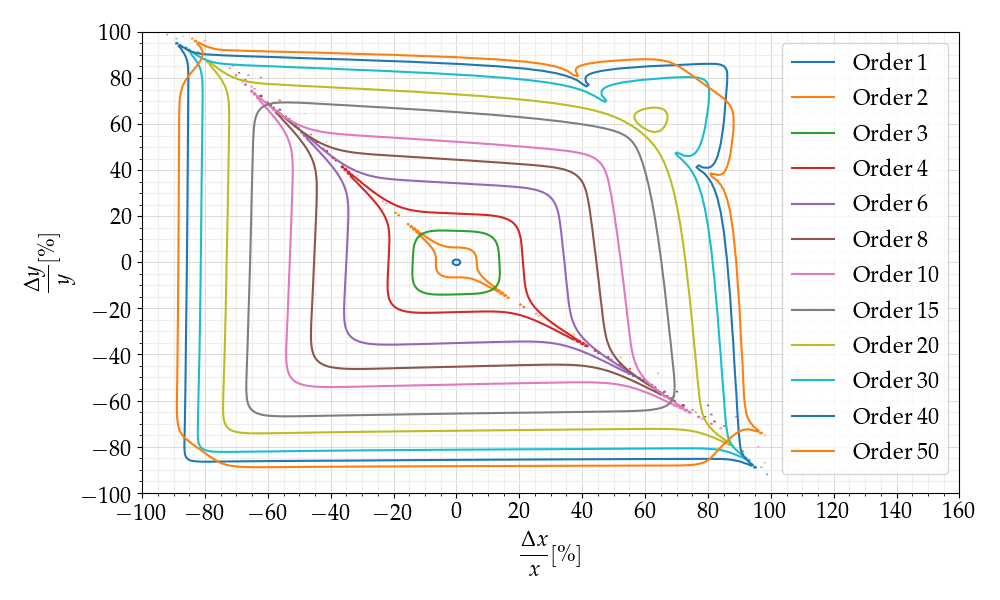

In [41]:
from matplotlib import ticker, cm, colors

rc('font',**{'family':'serif','serif':['Palatino'], 'size':16})
             
fig = plt.figure(figsize=(10,6))
lev_exp = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,14],dtype=np.float64)
levs = np.power(10, lev_exp)
# cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

# cp = plt.contourf(100*Tr/ro.real,100*TE/E.real,error_ti[0], levels=16,locator=ticker.LogLocator(10),norm=colors.LogNorm(vmax = 1e1), cmap=cm.jet)
# cp = plt.contourf(100*Tr/ro.real,100*TE/E.real,error_ti[0], levs,antialiased=True, norm=colors.LogNorm(vmax = 1e1), cmap=cm.jet)
# cbar = fig.colorbar(cp)

for kk in range(len(orders_ti)):
    CS=plt.contour(100*Tx/x.real,100*Ty/y.real,error_ti[-1-kk], [1e-4], colors = 'C'+str(kk))
    
#     plt.clabel(CS,fmt='Order '+str(orders_ti[kk]), inline=1, fontsize=12, colors='k')
#     plt.clabel(CS,fmt='Ord. '+str(orders_ti[-1-kk]), inline=1, fontsize=8, colors='k')
    
    CS.collections[0].set_label('Order '+str(orders_ti[-1-kk]))

# cbar.ax.set_ylabel("Relative error of \n$\\left.\\mathbf{u}(r_o+\\Delta r_o, E+\\Delta E)\\right|_{r_i}$")
plt.xlabel("$\\displaystyle{\\frac{\Delta x}{x}} [ \% ]$")
plt.ylabel("$\\displaystyle{\\frac{\Delta y}{y}} [ \% ]$")


ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(10))
plt.grid(which='major',color='#CCCCCC', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor',color='#EEEEEE')

plt.axis([-100,160,-100,100])
plt.legend()
plt.tight_layout()
plt.savefig('error_ti_logxy_notrunc_orders.pdf',dpi=150)
plt.show()

<IPython.core.display.Javascript object>


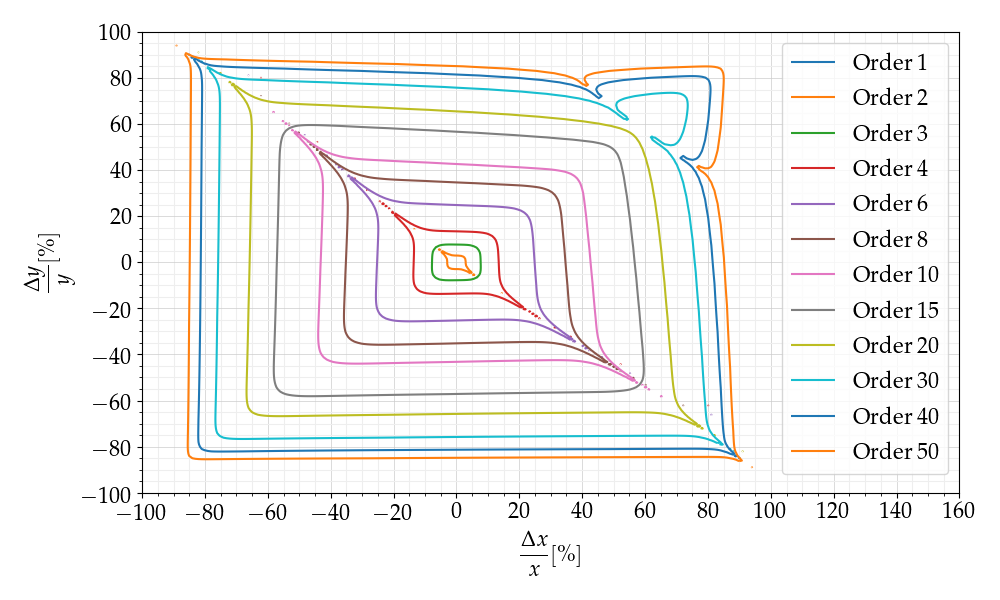

/home/maristi7/anaconda3/envs/pyoti/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: No contour levels were found within the data range.
  from ipykernel import kernelapp as app


In [42]:
from matplotlib import ticker, cm, colors

rc('font',**{'family':'serif','serif':['Palatino'], 'size':16})
             
fig = plt.figure(figsize=(10,6))
lev_exp = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,14],dtype=np.float64)
levs = np.power(10, lev_exp)
# cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

# cp = plt.contourf(100*Tr/ro.real,100*TE/E.real,error_ti[0], levels=16,locator=ticker.LogLocator(10),norm=colors.LogNorm(vmax = 1e1), cmap=cm.jet)
# cp = plt.contourf(100*Tr/ro.real,100*TE/E.real,error_ti[0], levs,antialiased=True, norm=colors.LogNorm(vmax = 1e1), cmap=cm.jet)
# cbar = fig.colorbar(cp)

for kk in range(len(orders_ti)):
    CS=plt.contour(100*Tx/x.real,100*Ty/y.real,error_ti_trunc[-1-kk], [1e-5], colors = 'C'+str(kk))
    
#     plt.clabel(CS,fmt='Order '+str(orders_ti[kk]), inline=1, fontsize=12, colors='k')
#     plt.clabel(CS,fmt='Ord. '+str(orders_ti[-1-kk]), inline=1, fontsize=8, colors='k')
    
    CS.collections[0].set_label('Order '+str(orders_ti[-1-kk]))

# cbar.ax.set_ylabel("Relative error of \n$\\left.\\mathbf{u}(r_o+\\Delta r_o, E+\\Delta E)\\right|_{r_i}$")
plt.xlabel("$\\displaystyle{\\frac{\Delta x}{x}} [ \% ]$")
plt.ylabel("$\\displaystyle{\\frac{\Delta y}{y}} [ \% ]$")


ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(10))
plt.grid(which='major',color='#CCCCCC', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor',color='#EEEEEE')

plt.axis([-100,160,-100,100])
plt.legend()
plt.tight_layout()
plt.savefig('error_ti_logxy_trunc_orders.pdf',dpi=150)
plt.show()